# Foundations Project

 ### Import Libraries & Load Data

In [2]:
# Import the functionalities needed to answer the brief:
import pandas as pd # used to "tidy" up and manipulate data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

In [94]:
# Load the data into a pandas dataframe called 'hr_data' using pandas read_csv
hr_data = pd.read_csv("foundations-data.csv")

hr_data.head()

,EmpID,UserName,FirstName,LastName,Gender,Ethnicity,Birth_Date,Age_Yrs,Year_Joined,Month_Joined,Day_Joined,Salary,SSN,PhoneNum,Marital_Status,City,US_State,Zip_code,US_Region,Password
0,407061,aalger,Angelina,Alger,Female,White (non-Hispanic),8/15/1964,41,2005,January,Wednesday,82232,660-24-4434,603-568-6118,Married,Rochester,NH,3867,Northeast,EAHcnWsf6xMRwr]
1,247137,aalpira,Abdul Ghani,al-Pirani,Male,Middle-Eastern,12/11/1978,49,2006,June,Wednesday,44147,399-31-7149,423-277-6819,Single,Knoxville,TN,37901,South,rSuD~3HS*{S
2,879753,acano,Andrew,Cano,Male,Hispanic,4/14/1996,45,2017,June,Friday,93715,459-99-9201,307-329-8832,Single,Banner,WY,82832,West,3a*&[Y^pV\0!rU
3,363065,ade lir,Andrea,De Lira Muniz,Female,Hispanic,11/10/1993,64,2015,October,Friday,64922,681-24-3165,212-825-1930,Single,New York City,NY,10087,Northeast,J}HJq/zVF-Aq2
4,474599,aelsaab,Abdul Jabbaar,el-Saab,Male,Middle-Eastern,3/19/1975,40,1998,October,Thursday,67142,447-27-3175,423-668-5506,Single,Lawrenceburg,TN,38464,South,cw?%U}s{?


In [95]:
#remove the PII

hr_data = hr_data.drop(["UserName", "FirstName", "LastName" , "SSN"], axis=1)
hr_data.head()

,EmpID,Gender,Ethnicity,Birth_Date,Age_Yrs,Year_Joined,Month_Joined,Day_Joined,Salary,PhoneNum,Marital_Status,City,US_State,Zip_code,US_Region,Password
0,407061,Female,White (non-Hispanic),8/15/1964,41,2005,January,Wednesday,82232,603-568-6118,Married,Rochester,NH,3867,Northeast,EAHcnWsf6xMRwr]
1,247137,Male,Middle-Eastern,12/11/1978,49,2006,June,Wednesday,44147,423-277-6819,Single,Knoxville,TN,37901,South,rSuD~3HS*{S
2,879753,Male,Hispanic,4/14/1996,45,2017,June,Friday,93715,307-329-8832,Single,Banner,WY,82832,West,3a*&[Y^pV\0!rU
3,363065,Female,Hispanic,11/10/1993,64,2015,October,Friday,64922,212-825-1930,Single,New York City,NY,10087,Northeast,J}HJq/zVF-Aq2
4,474599,Male,Middle-Eastern,3/19/1975,40,1998,October,Thursday,67142,423-668-5506,Single,Lawrenceburg,TN,38464,South,cw?%U}s{?


In [4]:
# Print the rows of each dataset
print("Rows in hr_data:", len(hr_data))

# .shape to inspect the dataset
print("Shape of hr_data:", hr_data.shape)

# I can see that there are 100 people in this data set and 20 variables (pieces of information about each person)

Rows in hr_data: 100
Shape of hr_data: (100, 20)


### Exploring the data

In [5]:
#view the headers to see what the variables are.
list(hr_data)

['EmpID',
 'UserName',
 'FirstName',
 'LastName',
 'Gender',
 'Ethnicity',
 'Birth_Date',
 'Age_Yrs',
 'Year_Joined',
 'Month_Joined',
 'Day_Joined',
 'Salary',
 'SSN',
 'PhoneNum',
 'Marital_Status',
 'City',
 'US_State',
 'Zip_code',
 'US_Region',
 'Password']

In [6]:
# Check the datatypes
hr_data.dtypes

EmpID              int64
UserName          object
FirstName         object
LastName          object
Gender            object
Ethnicity         object
Birth_Date        object
Age_Yrs            int64
Year_Joined        int64
Month_Joined      object
Day_Joined        object
Salary             int64
SSN               object
PhoneNum          object
Marital_Status    object
City              object
US_State          object
Zip_code           int64
US_Region         object
Password          object
dtype: object

For my brief, I need to determine if there are any employment or salary biases based on gender. 

In [7]:
#Understand how 'Gender' and 'Salary' is measured

hr_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
hr_data['Salary'].unique()

array([ 82232,  44147,  93715,  64922,  67142,  36108,  69253,  89450,
        51972,  81339,  46768,  28141,  48941,  40642,  43193,  48640,
        36898,  68047,  25583,  56317, 106303,  50354, 104330,  64148,
        48800,  77779,  65834,  39271,  83007,  75056,  73614,  30014,
       107855,  49971,  37242,  85215,  40409,  68322,  60601,  58856,
        71214,  78932,  72809,  71567,  51673,  50148,  55837, 111502,
        38137, 115019,  67024, 106944,  79792,  37932,  78791,  91622,
        54786,  84626,  78665,  72219, 111435,  91600, 102704,  82610,
        35807,  55634,  77417, 103472,  75859,  59757,  45236,  95215,
        41353,  29073,  38117,  64864,  82580,  69568,  85383,  26153,
        43895,  44169,  33794,  33559,  39155,  71337, 118826,  80215,
       103356,  77801,  35618,  79624,  84724,  56870,  44414, 111577,
       109390,  86602,  61893,  55554], dtype=int64)

In [9]:
hr_data['Gender'].value_counts()

Male      50
Female    50
Name: Gender, dtype: int64

In [10]:
hr_data['Salary'].value_counts()

95215     1
106303    1
86602     1
111435    1
40409     1
109390    1
107855    1
38137     1
55634     1
75859     1
78932     1
80215     1
64864     1
56317     1
44169     1
55554     1
89450     1
35807     1
72809     1
78665     1
59757     1
44147     1
43895     1
37242     1
78791     1
67142     1
83007     1
30014     1
54786     1
51972     1
         ..
25583     1
39155     1
84724     1
106944    1
40642     1
103356    1
118826    1
81339     1
69253     1
85383     1
41353     1
104330    1
73614     1
71567     1
111502    1
29073     1
84626     1
33794     1
64148     1
35618     1
43193     1
64922     1
115019    1
48800     1
71337     1
79792     1
82610     1
45236     1
60601     1
48640     1
Name: Salary, Length: 100, dtype: int64

In [11]:
hr_data["Gender"].describe()

count      100
unique       2
top       Male
freq        50
Name: Gender, dtype: object

In [12]:
hr_data["Salary"].describe()

count       100.000000
mean      66658.800000
std       24214.744715
min       25583.000000
25%       45030.500000
50%       67083.000000
75%       82587.500000
max      118826.000000
Name: Salary, dtype: float64

In [13]:
# check for duplicate enteries 
len(np.unique(hr_data['Salary']))

100

I can see that the variable 'Gender' is a categorical variable having only two categories (male and female) but there is no intrinsic ordering to the categories.

I can see that there are 100 enteries, with 50 men and 50 women- so on first view it would appear the company are hiring fairly based solely on Gender. 

I can see that the variable 'Salary' is a continuous variable and that all 100 people are paid a different salary. 

Now I need to understand if the company is biased in what salaries they offer based on a persons gender.

I will do these using descriptive statisitcs. 

### Descriptive Statistics

In [66]:
hr_data.describe()

,EmpID,Age_Yrs,Year_Joined,Salary,Zip_code
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,547652.10000,44.820000,2008.120000,66658.800000,53011.230000
std,257664.16679,12.525836,8.642484,24214.744715,23007.336848
min,134841.00000,21.000000,1983.000000,25583.000000,3867.000000
25%,328643.75000,34.750000,2003.000000,45030.500000,37580.500000
50%,497414.00000,46.000000,2010.500000,67083.000000,52855.000000
75%,766040.00000,55.250000,2015.000000,82587.500000,69514.500000
max,979607.00000,65.000000,2017.000000,118826.000000,99791.000000


In [15]:
# Compare the mean salary by gender
hr_data.groupby(by='Gender')['Salary'].mean()

Gender
Female    55836.74
Male      77480.86
Name: Salary, dtype: float64

In [16]:
# Compare the meadian salary by gender
hr_data.groupby(by='Gender')['Salary'].median()

Gender
Female    50971.5
Male      77598.0
Name: Salary, dtype: float64

Based on these results, I can tentatively identify a few trends in the data. 

If we're basing our evaluations on the mean or the median, it appears that Males are paid higher than Females. 

With both the mean and median, it seems the difference is about £21.5k (mean) and £26.6k (median)

I now need to establish if there is a significant difference between the bottom and top salary ranges by gender by hypothesis testing. 

### Measuring the spread of the data

Establish how much spread/deviation/variation there is the data. It will be useful to understand how dispersed my data points are.

In [17]:
# Range (difference between the top and bottom salary)
hr_data['Salary'].max()-hr_data['Salary'].min()

93243

In [18]:
hr_data.groupby(by='Gender')['Salary'].max()-hr_data['Salary'].min()

Gender
Female    63867
Male      93243
Name: Salary, dtype: int64

In [19]:
# Variance by Gender
hr_data.groupby(by='Gender')['Salary'].var()

Gender
Female    3.797483e+08
Male      5.659116e+08
Name: Salary, dtype: float64

In [20]:
# Standard deviation by Gender
hr_data.groupby(by='Gender')['Salary'].std()

Gender
Female    19487.130653
Male      23788.896931
Name: Salary, dtype: float64

This shows me that there is more variability among the salaries of Males than there are for Females. 

### Visualising the distributions
I will now use seaborn and matplotlib.pyplot to create visuals of my data

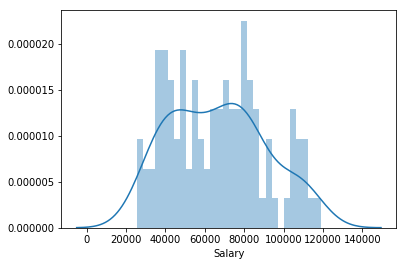

In [31]:
# visual based just on salary
sns.distplot(hr_data['Salary'], hist=True, rug=False, bins=30)

Text(0, 0.5, 'Gender')

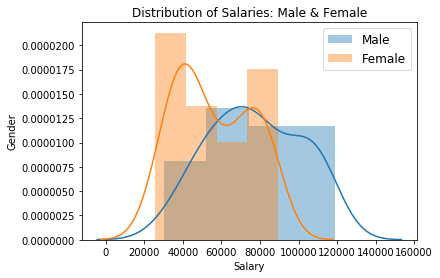

In [59]:
# visual based on salary and gender
Male = hr_data[hr_data['Gender'] == 'Male']
Female = hr_data[hr_data['Gender'] == 'Female']

sns.distplot(Male['Salary'], hist = True, kde = True, label='Male')
sns.distplot(Female['Salary'], hist = True, kde = True, label='Female')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Salaries: Male & Female')
plt.xlabel('Salary')
plt.ylabel('Gender')

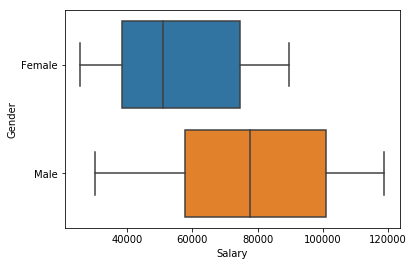

In [55]:
#visualise the spread of the data using a boxplot
sns.boxplot(x=hr_data['Salary'], y=hr_data['Gender'])

## Research questions and hypotheses¶

Research question: Does the gender of an employee help predict whether they will be paid a higher salary?

Null hypothesis: The salaries of Males and Females are equal (e.g. there is no difference between the two). If there is a difference, then it is due to random chance)

Alternative hypothesis: The salaries of Males is different that Females. The difference is so large it cannot simple be due to chance; it's statistically significant. 


Significance level: 0.05
Confidence level: 0.95


In [43]:
# Create subsets of the column 'Salary' by the different Genders so we can do a t-test. 
Male = hr_data[hr_data['Gender']== 'Male']['Salary']
Female = hr_data[hr_data['Gender']== 'Female']['Salary']

In [44]:
# Run a Student's t-test
t_test =stats.ttest_ind(Male, Female)

# Check summary results
t_test

Ttest_indResult(statistic=4.97688325595364, pvalue=2.7650476599728173e-06)

In [45]:
# Use an if-else statement to spit out a coherent result for us
if t_test.pvalue < 0.05:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 2.7650476599728173e-06 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


The p-value is 2.7650476599728173e-06 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.

In [46]:
# Run a Welch's t-test (unequal variances)
welch = stats.ttest_ind( Male, Female, equal_var= False)
if welch.pvalue < 0.05:
    print('The p-value is', welch.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', welch.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 2.9020777373581405e-06 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


In [47]:
# Save result in a variable called 'Male_normal'
Male_normal = stats.normaltest(Male)
Male_normal

NormaltestResult(statistic=6.282480752279872, pvalue=0.043229144234422145)

In [48]:
# Save result in a variable called 'Female_normal'
Female_normal = stats.normaltest(Female)
Female_normal

NormaltestResult(statistic=23.505764497893452, pvalue=7.866618567292588e-06)

The p-values from the normality tests show that while Female is greater than 0.05, Male is lower than 0.05, which means we have strong enough evidence to reject the Null and I conclude that the data is not normally distributed. 


Since the t-test assumption of normality does not stand, I reject the test(s) as valid -- and reject Welch's t-test result because it assumes the variances are equal, which they are not. 

## Conclusions

I've run through a number of statistical tools to better understand the data and answer the question posed at the beginning of this workshop: If there are any employment or salary biases based on gender?

The calculation indicates this is the case.

My analysis of the descriptive statistics suggests that Males are, on average, paid more than Females. 

After running two statistical tests -- Student's t-test and Welch's t-test -- I rejected the null hypothesis, which stated that the average salaries between the two groups are different from one another.

I conclude with 95% confidence that the observed difference of 0.197 stars is indeed statistically significant.

